# Baseline models

In [1]:
import pandas as pd
from sklearn.metrics import classification_report

from model_utils import calc_gini_coef, plot_pr_curve, plot_roc_curve

In [2]:
from model_utils import split_dataset

CLIENT_PATH = '../data/initial/CLIENTS.csv'
FEATURES_PATH = '../data/features/features_2.csv'

X_train, X_valid, X_test, y_train, y_valid, y_test = split_dataset(CLIENT_PATH, FEATURES_PATH, valid_size=0.2)

## Random guessing

In [3]:
import random

class RandomModel:
    @staticmethod
    def predict_proba(X):
        return pd.Series(list(random.random() for _ in range(X.shape[0])))


In [4]:
y_true = y_valid
y_pred_proba = RandomModel.predict_proba(X_valid)

Gini Coefficient:  -0.014468391479238063


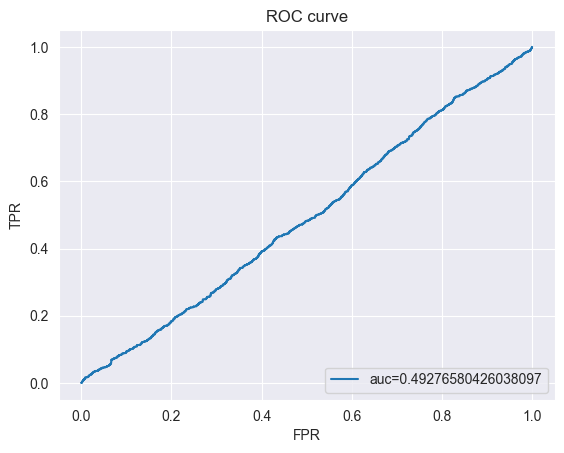

In [5]:
gini_coef = calc_gini_coef(y_true, y_pred_proba)
print('Gini Coefficient: ', gini_coef)

plot_roc_curve(y_true, y_pred_proba)

In [6]:
y_pred = (y_pred_proba >= 0.5).astype(int)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.48      0.58      4185
        True       0.24      0.50      0.32      1374

    accuracy                           0.48      5559
   macro avg       0.49      0.49      0.45      5559
weighted avg       0.62      0.48      0.52      5559



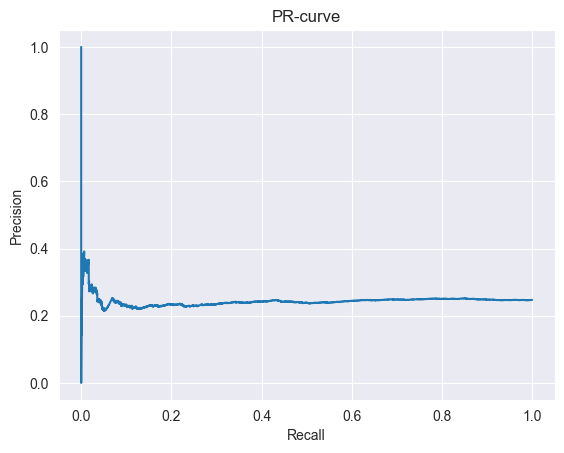

In [7]:
plot_pr_curve(y_true, y_pred_proba)

## Top class prediction

In [8]:
class SingleClassPredictionModel:
    @staticmethod
    def predict_proba(X, prob=1.0):
        return pd.Series(list(prob for _ in range(X.shape[0])))


In [9]:
y_true = y_valid
y_pred_proba = SingleClassPredictionModel.predict_proba(X_valid, prob=0)

Gini Coefficient:  0.0


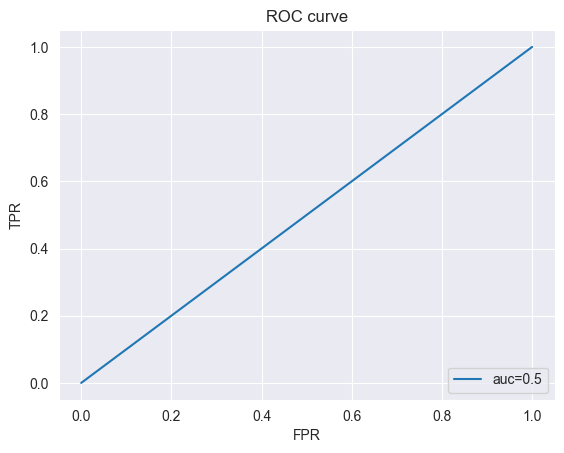

In [10]:
gini_coef = calc_gini_coef(y_true, y_pred_proba)
print('Gini Coefficient: ', gini_coef)

plot_roc_curve(y_true, y_pred_proba)

In [11]:
y_pred = (y_pred_proba >= 0.5).astype(int)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.75      1.00      0.86      4185
        True       0.00      0.00      0.00      1374

    accuracy                           0.75      5559
   macro avg       0.38      0.50      0.43      5559
weighted avg       0.57      0.75      0.65      5559



C:\Users\dan\PycharmProjects\ds\ff_internship\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dan\PycharmProjects\ds\ff_internship\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dan\PycharmProjects\ds\ff_internship\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

In [ ]:
plot_pr_curve(y_true, y_pred_proba)